# 敏感性分析

In [2]:
import numpy as np

# 定义数据
data = np.array([
    [75, 91, 83, 67, 88],  # a
    [92, 78, 66, 35, 93],  # b
    [59, 72, 66, 90, 89],  # c
    [85, 71, 53, 67, 98],  # d
    [77, 68, 69, 75, 99],  # e
    [69, 72, 85, 90, 79],  # f
    [75, 81, 83, 97, 88],  # g
    [98, 78, 66, 65, 93],  # h
    [71, 53, 67, 90, 89],  # i
    [75, 81, 83, 67, 88],  # j
    [83, 67, 88, 35, 93],  # k
    [59, 72, 66, 90, 89],  # l
    [75, 91, 71, 53, 67],  # m
    [92, 91, 83, 67, 93],  # n
    [59, 72, 91, 83, 89],  # o
])


In [3]:
weights =np.array([0.18173096,0.13125534,0.1494729,0.46453017,0.07301064])

In [4]:
data@weights.reshape(-1,1)

array([[75.52876635],
       [59.87092171],
       [78.34338478],
       [70.96688855],
       [75.30009325],
       [82.27057308],
       [88.15211805],
       [74.89721257],
       [78.17977774],
       [74.21621295],
       [60.07993813],
       [78.34338478],
       [65.69844573],
       [78.98324587],
       [78.82849609]])

In [5]:
import pandas as pd

In [6]:
index = list('abcdefghijklmno')
columns = ['M','Mo','Co','W','C']
df = pd.DataFrame(data,index=index,columns=columns)

In [7]:
df

M  Mo  Co   W   C
a  75  91  83  67  88
b  92  78  66  35  93
c  59  72  66  90  89
d  85  71  53  67  98
e  77  68  69  75  99
f  69  72  85  90  79
g  75  81  83  97  88
h  98  78  66  65  93
i  71  53  67  90  89
j  75  81  83  67  88
k  83  67  88  35  93
l  59  72  66  90  89
m  75  91  71  53  67
n  92  91  83  67  93
o  59  72  91  83  89

In [8]:
df1 = df.copy()
df1['Score'] = df.values@weights

In [10]:
df1.sort_values(by='Score',ascending=False) # g,f,n,o,c

M  Mo  Co   W   C      Score
g  75  81  83  97  88  88.152118
f  69  72  85  90  79  82.270573
n  92  91  83  67  93  78.983246
o  59  72  91  83  89  78.828496
c  59  72  66  90  89  78.343385
l  59  72  66  90  89  78.343385
i  71  53  67  90  89  78.179778
a  75  91  83  67  88  75.528766
e  77  68  69  75  99  75.300093
h  98  78  66  65  93  74.897213
j  75  81  83  67  88  74.216213
d  85  71  53  67  98  70.966889
m  75  91  71  53  67  65.698446
k  83  67  88  35  93  60.079938
b  92  78  66  35  93  59.870922

In [11]:
def adjust_weight(original_weights,adjust_ind,p=0.1):
    w_adj = original_weights[adjust_ind]
    w_adj_new = w_adj*(1+p)
    w_other_total_new = 1-w_adj_new
    w_other_total_old = 1-w_adj
    new_weights = np.zeros(len(original_weights))
    r = w_other_total_new/w_other_total_old
    for i in range(len(original_weights)):
        if i == adjust_ind:
            new_weights[i] = w_adj_new
        else:
            new_weights[i] = original_weights[i]*r
    return new_weights

In [12]:
adjust_weight(weights,3,0.1)

array([0.16596546, 0.11986869, 0.13650584, 0.51098319, 0.06667683])

In [13]:
weights

array([0.18173096, 0.13125534, 0.1494729 , 0.46453017, 0.07301064])

In [17]:
parray = np.linspace(-0.1,0.1,20)
glist = []
flist = []
nlist = []
olist = []
clist = []
for p in parray:
    weights_adj =adjust_weight(weights,3,p=p)
    df1 = df.copy()
    df1['Score'] = df.values@weights_adj.reshape(-1,1)
    g = df1.loc['g','Score']
    glist.append(g)
    f = df1.loc['f','Score']
    flist.append(f)
    n = df1.loc['n','Score']
    nlist.append(n)
    o = df1.loc['o','Score']
    olist.append(o)
    c = df1.loc['c','Score']
    clist.append(c)

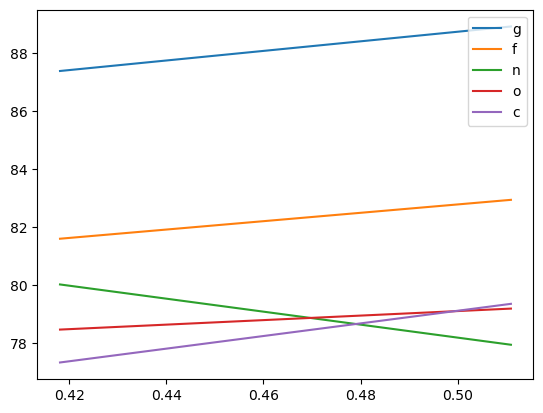

In [18]:
import matplotlib.pyplot as plt
xarray =  0.46453017*(1+parray)
plt.plot(xarray,glist,label='g')
plt.plot(xarray,flist,label='f')
plt.plot(xarray,nlist,label='n')
plt.plot(xarray,olist,label='o')
plt.plot(xarray,clist,label='c')
plt.legend()

In [22]:
parray = np.linspace(-0.1,0.1,5)
glist = []
flist = []
nlist = []
olist = []
clist = []
for p in parray:
    weights_adj =adjust_weight(weights,3,p=p)
    df1 = df.copy()
    df1['Score'] = df.values@weights_adj.reshape(-1,1)
    df1['Rank'] = df1['Score'].rank(ascending=False)
    g = df1.loc['g','Rank']
    glist.append(g)
    f = df1.loc['f','Rank']
    flist.append(f)
    n = df1.loc['n','Rank']
    nlist.append(n)
    o = df1.loc['o','Rank']
    olist.append(o)
    c = df1.loc['c','Rank']
    clist.append(c)

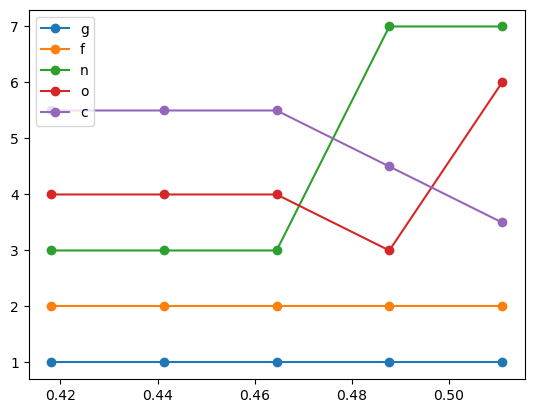

In [24]:
import matplotlib.pyplot as plt
xarray =  0.46453017*(1+parray)
plt.plot(xarray,glist,label='g',marker='o')
plt.plot(xarray,flist,label='f',marker='o')
plt.plot(xarray,nlist,label='n',marker='o')
plt.plot(xarray,olist,label='o',marker='o')
plt.plot(xarray,clist,label='c',marker='o')
plt.legend()

In [25]:
df1 = df.copy()
df1['Score'] = df.values@adjust_weight(weights,3,p=-0.1).reshape(-1,1)
df1['Rank'] = df1['Score'].rank(ascending=False)
df1

M  Mo  Co   W   C      Score  Rank
a  75  91  83  67  88  76.268653   8.0
b  92  78  66  35  93  62.028521  15.0
c  59  72  66  90  89  77.332151   5.5
d  85  71  53  67  98  71.311024  12.0
e  77  68  69  75  99  75.326127  10.0
f  69  72  85  90  79  81.600031   2.0
g  75  81  83  97  88  87.384548   1.0
h  98  78  66  65  93  75.755814   9.0
i  71  53  67  90  89  77.154351   7.0
j  75  81  83  67  88  74.842233  11.0
k  83  67  88  35  93  62.255670  14.0
l  59  72  66  90  89  77.332151   5.5
m  75  91  71  53  67  66.800060  13.0
n  92  91  83  67  93  80.022815   3.0
o  59  72  91  83  89  78.466610   4.0

In [21]:
df1['Score'].rank(ascending=False)

a     9.0
b    15.0
c     3.5
d    12.0
e     8.0
f     2.0
g     1.0
h    10.0
i     5.0
j    11.0
k    14.0
l     3.5
m    13.0
n     7.0
o     6.0
Name: Score, dtype: float64

# 熵权法

In [26]:
def entropy(plist):
    s = 0
    for p in plist:
        s = s-p*np.log(p)
    return s

In [27]:
entropy([0.1,0.1,0.8])

0.639031859650177

In [28]:
entropy([0.3,0.4,0.3])

1.0888999753452238

In [29]:
entropy([0.5,0.2,0.3])

1.0296530140645737

In [30]:
entropy([1/3,1/3,1/3])

1.0986122886681096

In [31]:
np.log(3)

1.0986122886681098

In [32]:
np.log10(10)

1.0

In [33]:
df

M  Mo  Co   W   C
a  75  91  83  67  88
b  92  78  66  35  93
c  59  72  66  90  89
d  85  71  53  67  98
e  77  68  69  75  99
f  69  72  85  90  79
g  75  81  83  97  88
h  98  78  66  65  93
i  71  53  67  90  89
j  75  81  83  67  88
k  83  67  88  35  93
l  59  72  66  90  89
m  75  91  71  53  67
n  92  91  83  67  93
o  59  72  91  83  89

In [35]:
# 进行归一化处理
p = df/df.sum()

In [38]:
# 计算信息熵
k = 1/np.log(len(df))
E = k*(-p*np.log(p)).sum()

In [39]:
E

M     0.995608
Mo    0.996745
Co    0.996179
W     0.986071
C     0.998641
dtype: float64

In [41]:
d = 1-E

In [42]:
w = d/d.sum()

In [43]:
w

M     0.164145
Mo    0.121665
Co    0.142802
W     0.520594
C     0.050794
dtype: float64